<a href="https://colab.research.google.com/github/g6104018-lang/repository2/blob/main/XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos la librería NumPy,
# que nos permite trabajar con matrices y arreglos numéricos
import numpy as np

# Definimos los datos de entrada para el problema XOR
# Cada fila representa un par de valores (dos bits de entrada)
X = np.array([
    [0, 0],  # Entrada 1: 0 XOR 0
    [0, 1],  # Entrada 2: 0 XOR 1
    [1, 0],  # Entrada 3: 1 XOR 0
    [1, 1]   # Entrada 4: 1 XOR 1
])

# Valores esperados del XOR para cada entrada
# XOR (exclusivo) devuelve 1 cuando los valores son diferentes
y = np.array([
    [0],  # 0 XOR 0 = 0
    [1],  # 0 XOR 1 = 1
    [1],  # 1 XOR 0 = 1
    [0]   # 1 XOR 1 = 0
])


In [2]:
#Se utiliza Sequential para definir el modelo de red neuronal.

#Se añaden capas de entrada y ocultas densamente conectadas (Dense)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# optimizador Adam Se compila el modelo
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)


In [5]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
#la función de pérdida de entropía cruzada categórica dispersa (binary_crossentropy) para la clasificación.

#También se puede usar directamente el nombre del optimizador ('adam') en el argumento optimizer de la función compile. En lugar de definir un optimizador personalizado.

Entrenar el modelo



In [6]:
#utilizando fit. Se especifica el número de épocas a realizar durante el entrenamiento.
history = modelo.fit(
    X, y,
    epochs=50,
    verbose=0,
)


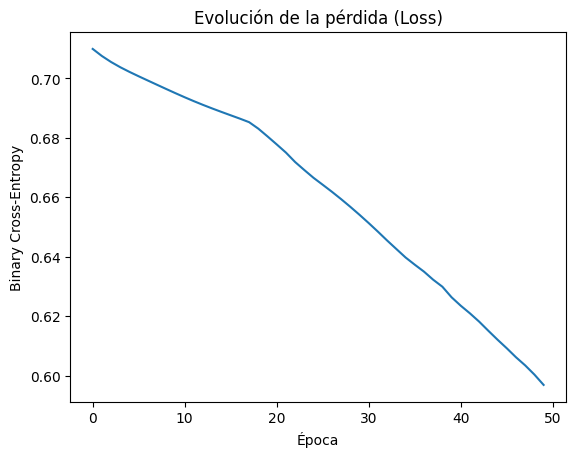

In [7]:
#import matplotlib.pyplot as plt
#Gráficando la funcion de pérdida
#debe tender hacia cero.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()

In [8]:
#Evaluar el modelo en el conjunto de prueba

# evaluate. Se obtienen la pérdida y la precisión del modelo en los datos de prueba.
loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7500 - loss: 0.5939
Loss: 0.5939033627510071, Accuracy: 0.75


In [10]:
#Predicción
#Hacer predicciones y comparar las predicciones con los valores reales
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[0 0] -> 0
[0 1] -> 0
[1 0] -> 1
[1 1] -> 0
